In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [52]:
from sklearn import preprocessing
import numpy as np
X = mnist.data.astype(float)
X = X/255
X = np.array(X)

In [53]:
y = preprocessing.LabelBinarizer().fit_transform(mnist.target)

train_size = 60000

X_train, X_test = np.split(X, [train_size])
y_train, y_test = np.split(y, [train_size])

Цифра:  8


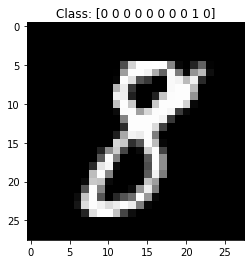

In [54]:
import matplotlib.pyplot as plt

G = 85     # номер изображения для вывода
plt.imshow(X_train[G].reshape([28, 28]), cmap='gray')
plt.title('Class: '+ str(y_train[G]))
print("Цифра: ", np.argmax(y_train[G]))

In [55]:
from keras.models import Sequential
from keras.layers.core import Dense

model = Sequential()
model.add(Dense(50, input_shape=(784,), activation="relu"))
model.add(Dense(10, activation="softmax"))

In [59]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='mse', metrics=['accuracy'], optimizer=Adam())

In [74]:
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 7.5120e-04 - accuracy: 0.9958
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 7.2756e-04 - accuracy: 0.9959
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 7.3037e-04 - accuracy: 0.9960
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 7.1878e-04 - accuracy: 0.9959
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 7.6063e-04 - accuracy: 0.9958


In [75]:
scores = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.0047 - accuracy: 0.9730


In [77]:
print(scores) 

[0.004708359483629465, 0.9729999899864197]


Результат работы НС:  0
Цифра :  0


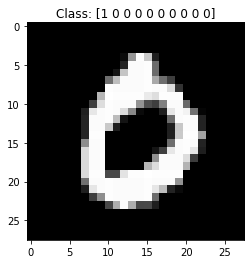

In [89]:
I = 3
plt.imshow(X_test[I].reshape([28, 28]), cmap='gray')
plt.title('Class: '+ str(y_test[I]))
print("Результат работы НС: ", np.argmax(model.predict(X_test[I].reshape([1,784]))))
print("Цифра : ", np.argmax(y_test[I]))